In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [140]:
from sklearn.datasets import make_classification
df = make_classification(n_samples=100, n_features=5, n_classes=3, n_clusters_per_class=2, n_informative=4, n_redundant=1)
data = df[0]
labels = df[1]

In [233]:
labels

array([0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 0,
       1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0])

In [141]:
class_0 = labels == 0
class_1 = labels == 1
class_2 = labels == 2
data[class_2]

array([[ 1.14423004e+00, -9.27498649e-01, -1.25444544e+00,
        -1.20963703e+00,  1.41368085e+00],
       [ 1.60966485e+00, -4.17625970e-01,  2.91819187e-01,
        -4.79195235e-01,  4.51560997e-01],
       [ 3.22024509e+00,  5.17351810e-01,  7.36903535e-01,
        -1.20980794e+00,  5.31675206e-01],
       [ 1.48727739e+00,  1.41849432e+00, -1.74208787e+00,
        -2.09062217e+00,  1.17487777e+00],
       [ 1.39086524e+00, -2.15084010e+00,  8.33442473e-01,
        -7.30722902e-01,  1.35068386e+00],
       [ 2.14121936e+00, -2.30858990e+00,  3.49942768e+00,
        -1.32758390e-01,  6.69802123e-01],
       [ 6.67795506e-01, -7.49809800e-01, -1.15722786e+00,
        -8.94867038e-01,  1.10102786e+00],
       [ 1.25659395e+00,  1.60657649e+00, -1.94610422e-01,
         7.40141860e-01, -1.33367979e+00],
       [ 1.08856304e+00, -8.37737495e-01, -2.02754945e+00,
        -1.79388980e+00,  1.92004837e+00],
       [ 1.43457930e+00,  5.26778071e-01,  4.24941173e-03,
         8.21913506e-01

In [55]:
data[class_0][0]

array([-0.7695586 , -0.14983136,  1.14838775, -0.3483656 ,  3.03182068])

In [61]:
data[class_0][:,3]

array([-0.3483656 , -0.69666551, -0.70663454, -1.1191159 , -1.22261087,
       -0.30793638,  0.2094355 ,  0.11838102,  0.50793899, -0.15657857,
       -0.61677357,  0.55372143, -0.98972274, -1.65728186,  0.62702598,
       -1.02569526, -0.51423337, -1.19831659, -1.04427361,  0.48275463,
       -1.82270942, -0.44887218, -1.55533977, -0.32073266, -0.90589521,
        0.00445053,  0.89376811, -0.29128876,  0.16956364, -2.27360224,
       -1.70559288, -0.82837124, -0.26922516, -0.24936069])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


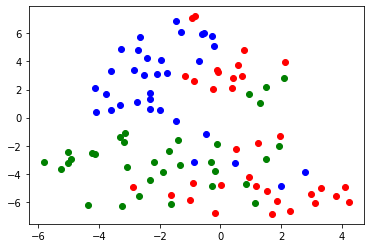

In [105]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def visualize(X, y):
    X_embedded = TSNE(n_components=2, perplexity=30,learning_rate='auto', init='pca').fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['r', 'b', 'g']
    # for every class, we'll add a scatter plot separately
    for label in [0, 1, 2]:
        # find the samples of the current class in the data
        cluster = X_embedded[y == label]
        # add a scatter plot with the corresponding color and label
        ax.scatter(cluster[:,0], cluster[:,1], c=colors[label], label=label)

    # finally, show the plot
    plt.show()

visualize(data, labels)

In [99]:
def generic_visualize(X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['r', 'b', 'g']
    # for every class, we'll add a scatter plot separately
    for label in [0, 1, 2]:
        # find the samples of the current class in the data
        cluster = X[y == label]
        # add a scatter plot with the corresponding color and label
        ax.scatter(cluster[:,0], cluster[:,1], c=colors[label], label=label)

    # finally, show the plot
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


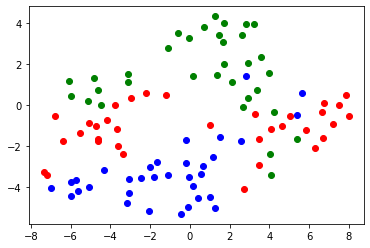

In [102]:
from metric_learn import LMNN

model = LMNN()
model.fit(data, labels)

visualize(model.transform(data), labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


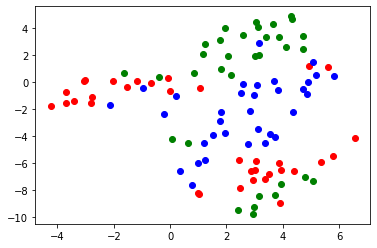

In [104]:
from metric_learn import NCA
model = NCA()
model.fit(data, labels)

visualize(model.transform(data), labels)

In [166]:
from itertools import product, combinations

same = []

for label in [0, 1, 2]:
    t = data[labels == label]
    same.append(list(combinations(t, 2)))
    
print(len(same))
same = np.concatenate(same, axis= 0)
same_labels = np.full((len(same), 1), 1).flatten()
same_labels[0]

3


1

In [252]:
different = []
for class1, class2 in list(combinations([0,1,2], 2)):
    print(class1, class2)
    v1 = data[labels == class1]
    v2 = data[labels == class2]
    different.append([[t, t2] for t, t2 in zip(v1, v2)])
    print(different[-1])
    #print(v1.shape, v2.shape)
    #c = np.array(list(product((v1, v2),)))
    #print('ITERATION', c.shape)
    #different.append(c)
    
different = np.concatenate(different, axis = 0)
different_labels = np.full((len(different), 1), -1).flatten()

0 1
[[array([-0.19470215, -1.55927091, -0.84155624,  1.60812533, -0.5872838 ]), array([ 0.90685122,  2.4439099 ,  1.25802311, -0.1012932 , -1.0908067 ])], [array([-0.71042513, -2.44318141, -1.07021893,  1.18972331,  0.1725624 ]), array([ 1.84097454, -1.34940126,  3.93908411,  1.78770344, -1.32225555])], [array([ 0.78791934, -2.20007767, -1.93522086,  1.31708049, -0.0495397 ]), array([ 0.09160862, -0.98054287, -0.88486308,  1.48960404, -0.74484698])], [array([ 1.81838266, -1.59298513, -1.02214946,  1.23341634, -0.36683247]), array([ 0.53257651,  0.81805543, -3.7070667 , -0.27516346,  0.15083985])], [array([ 1.47090107, -3.1507658 , -1.00134092,  1.84731509, -0.20077659]), array([-0.98664365, -2.77809124,  3.32344545,  1.15504094,  0.00393302])], [array([-0.90156518, -1.73704105, -1.92640136,  0.61893047,  0.42482692]), array([-2.63114412, -3.61364774,  0.02017023,  0.83361207,  0.97551508])], [array([ 0.80221489, -2.09642125, -1.31428243,  0.92542646,  0.17732883]), array([ 1.14961894, 

In [265]:
training = np.concatenate((same, different), axis=0)
training.shape

(1720, 2, 5)

In [268]:
all_labels = np.concatenate((same_labels, different_labels), axis=0)
all_labels.shape

(1720,)

In [273]:
from metric_learn import MMC
model = MMC()
model.fit(training, all_labels)

MMC()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


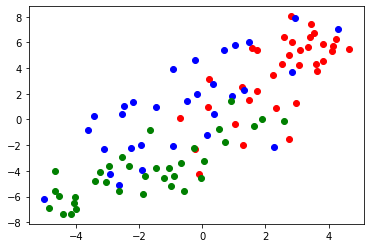

In [274]:
visualize(model.transform(data), labels)

In [276]:
from sklearn.metrics.pairwise import paired_euclidean_distances
paired_euclidean_distances(model.transform(data), data)

array([2.85635564, 3.33099405, 3.17240111, 3.65173404, 2.78700816,
       3.10115249, 4.40306553, 1.87233931, 5.22915251, 3.84270019,
       3.08105107, 4.01372324, 2.45625334, 2.98995055, 4.12838607,
       3.11802621, 4.90937981, 4.90848176, 2.1576082 , 2.86351779,
       4.87499678, 3.09869279, 2.432352  , 3.29808126, 2.26613753,
       3.72667448, 2.510008  , 2.33763672, 2.57835303, 3.76055063,
       1.95751517, 2.20236758, 2.71371763, 3.74421629, 3.14267756,
       3.01458842, 2.71853843, 3.89205928, 2.87763205, 2.79542833,
       5.02452236, 2.90058515, 2.23041642, 2.85402575, 2.84072254,
       2.23004238, 3.31860322, 2.63725775, 4.62647535, 2.16765909,
       4.18843983, 3.33422045, 5.62558119, 4.28896269, 3.78505451,
       2.61998091, 3.50696989, 4.72602101, 3.18021619, 2.50055171,
       1.01148916, 1.64596352, 3.32013272, 4.48047997, 3.40909788,
       1.36726825, 4.8078745 , 2.69467934, 3.24141824, 2.13315725,
       3.0203686 , 2.58892118, 1.12156427, 3.83964149, 2.11820